In [1]:
import numpy as np
import pandas as pd
from data.human_robot_interaction_data.skeleton_vis import normal_skeleton
from mpl_toolkits.mplot3d import Axes3D
from read_hh_hr_data import *
from read_hh_hr_data import read_data
from skeleton_vis import visualize_skeleton
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

In [22]:
%matplotlib inline


def plot_frame(ax, data, frame_idx):
    #fig = plt.figure()
    #ax = plt.axes(projection='3d')
    ax.view_init(10, 30)
    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')

    #ax.cla()
    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')
    ax.set_facecolor('none')
    ax.set_xlim3d([-1, 1])
    ax.set_ylim3d([-1, 1])
    ax.set_zlim3d([-0.8, 0.8])


    x = data[frame_idx, :, 0]
    y = data[frame_idx, :, 1]
    z = data[frame_idx, :, 2]
    ax.scatter(x, z, y, color='r', marker='o')

    # for part in body:
    for part in connections:
        x_plot = x[part]
        y_plot = y[part]
        z_plot = z[part]
        ax.plot(x_plot, z_plot, y_plot, color='b')


In [85]:
def load_data(path, seg_path):
    data_p, data_q, names, times = read_data(path)
    segments = np.load(seg_path)
    s = segments[0]
    data = data_p[s[0]:s[1]]
    idx_list = np.linspace(0,data.shape[0],70,endpoint=False).astype(int)
    data = data[idx_list]
    data = normal_skeleton(data)
    return data

In [23]:
# data_p, data_q, names, times = read_data('hh/p2/hand_wave_s2_1.csv')
# segments = np.load('hh/segmentation/hand_wave_2.npy')
# s = segments[0]
# data = data_p[s[0]:s[1]]
# idx_list = np.linspace(0,data.shape[0],70,endpoint=False).astype(int)
# data = data[idx_list]
# data = normal_skeleton(data)

In [93]:
def plot_data(data1, data2):
    offset = np.ones_like(data2)*0.35
    offset[:, :, :2] = 0

    r = R.from_euler('y', 180, degrees=True)
    rot_data = (r.as_matrix() @ data2.reshape(-1,3).T).T.reshape(data2.shape)
    fig, ax = plt.subplots(nrows=2, ncols=2, subplot_kw=dict(projection='3d'))
    fig.set_size_inches(18.5, 10.5)
    fig.tight_layout(pad=.1)
    plot_frame(ax[0][0], data1-offset, 0)
    plot_frame(ax[0][0], rot_data+offset, 0)

    plot_frame(ax[0][1], data1-offset, 20)
    plot_frame(ax[0][1], rot_data+offset, 20)

    plot_frame(ax[1][0], data1-offset, 40)
    plot_frame(ax[1][0], rot_data+offset, 40)

    plot_frame(ax[1][1], data1-offset, 60)
    plot_frame(ax[1][1], rot_data+offset, 60)

In [91]:
#hand_shake
data1_hand_shake = load_data('hh/p1/hand_shake_s1_1.csv', 'hh/segmentation/hand_shake_1.npy')
data2_hand_shake = load_data('hh/p2/hand_shake_s2_1.csv', 'hh/segmentation/hand_shake_2.npy')

#hand_wave
data1_hand_wave = load_data('hh/p1/hand_wave_s1_1.csv', 'hh/segmentation/hand_wave_1.npy')
data2_hand_wave = load_data('hh/p2/hand_wave_s2_1.csv', 'hh/segmentation/hand_wave_2.npy')

#parachute
data1_parachute = load_data('hh/p1/parachute_s1_1.csv', 'hh/segmentation/parachute_1.npy')
data2_parachute = load_data('hh/p2/parachute_s2_1.csv', 'hh/segmentation/parachute_2.npy')

#rocket
data1_rocket = load_data('hh/p1/rocket_s1_1.csv', 'hh/segmentation/rocket_1.npy')
data2_rocket = load_data('hh/p2/rocket_s2_2.csv', 'hh/segmentation/rocket_2.npy')

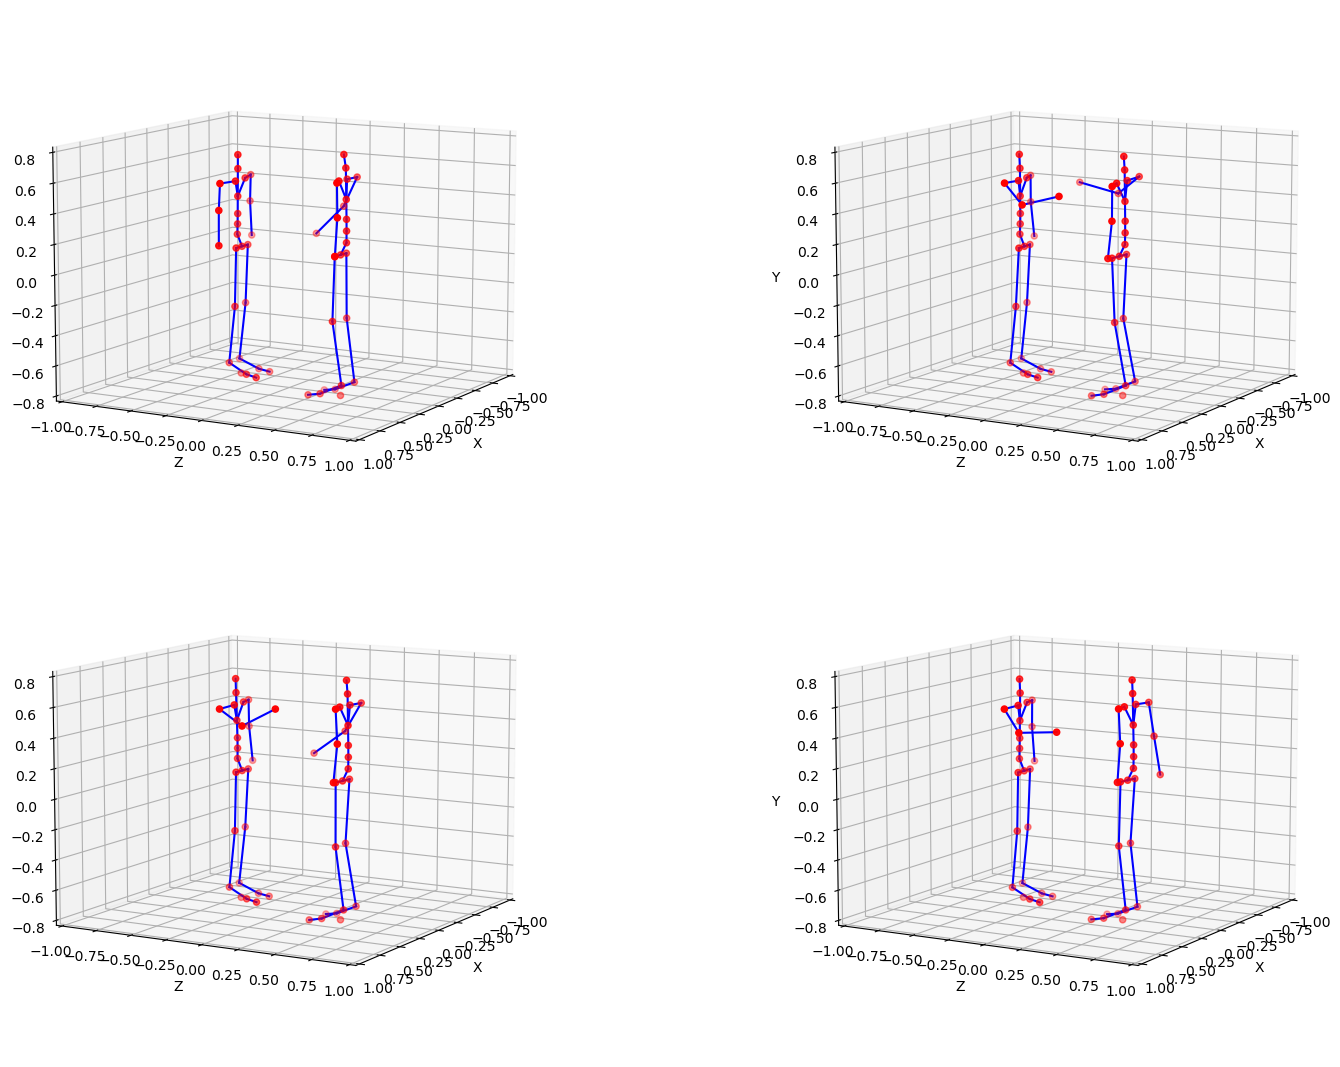

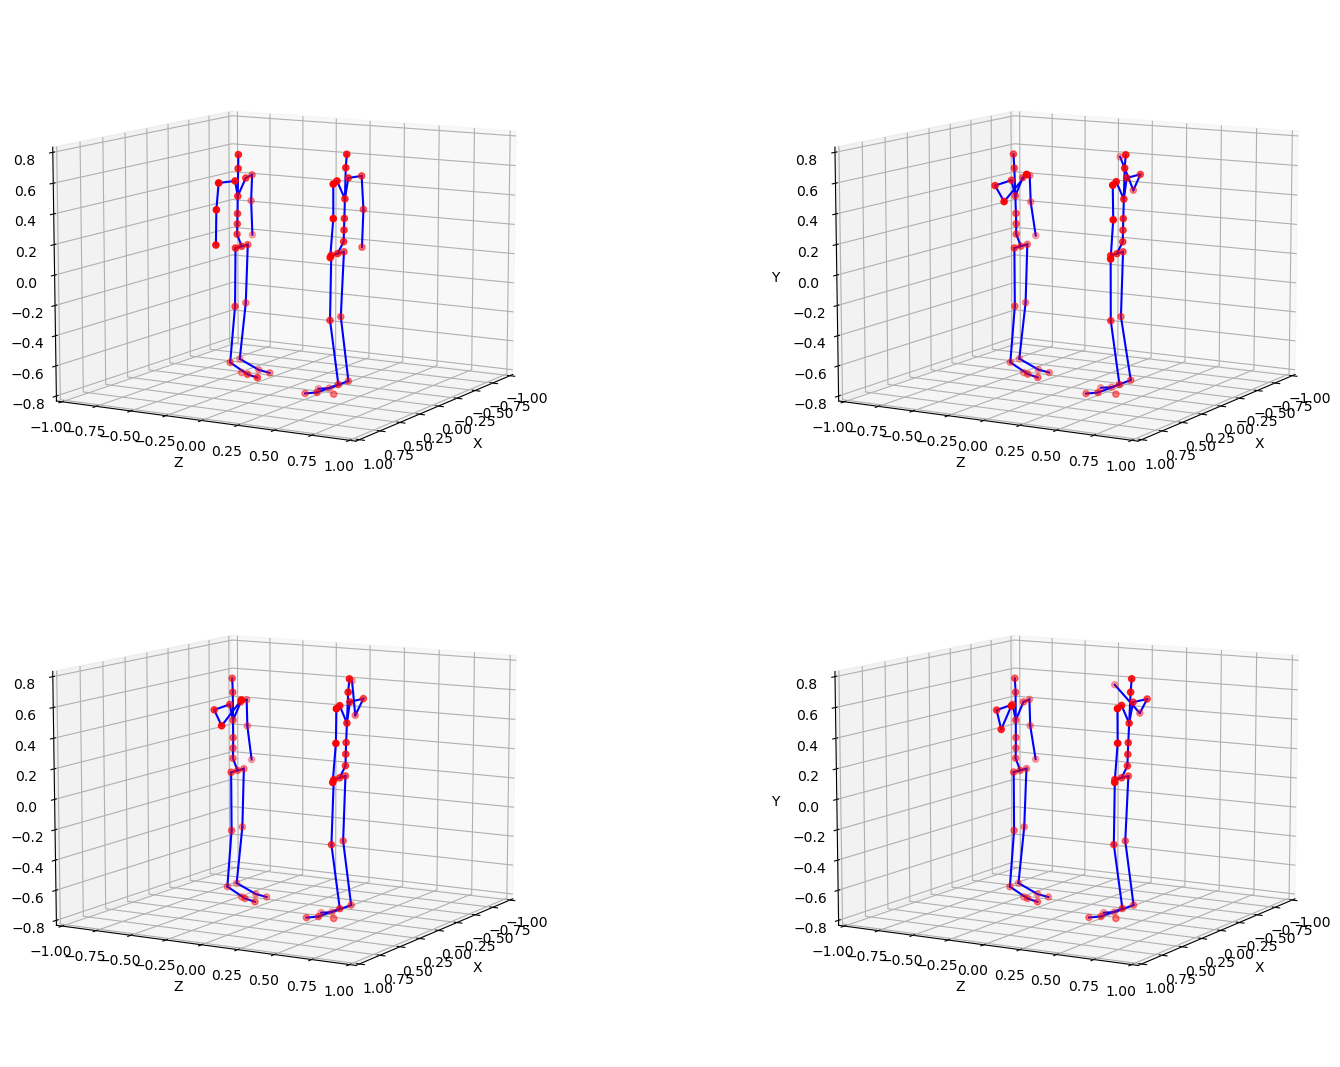

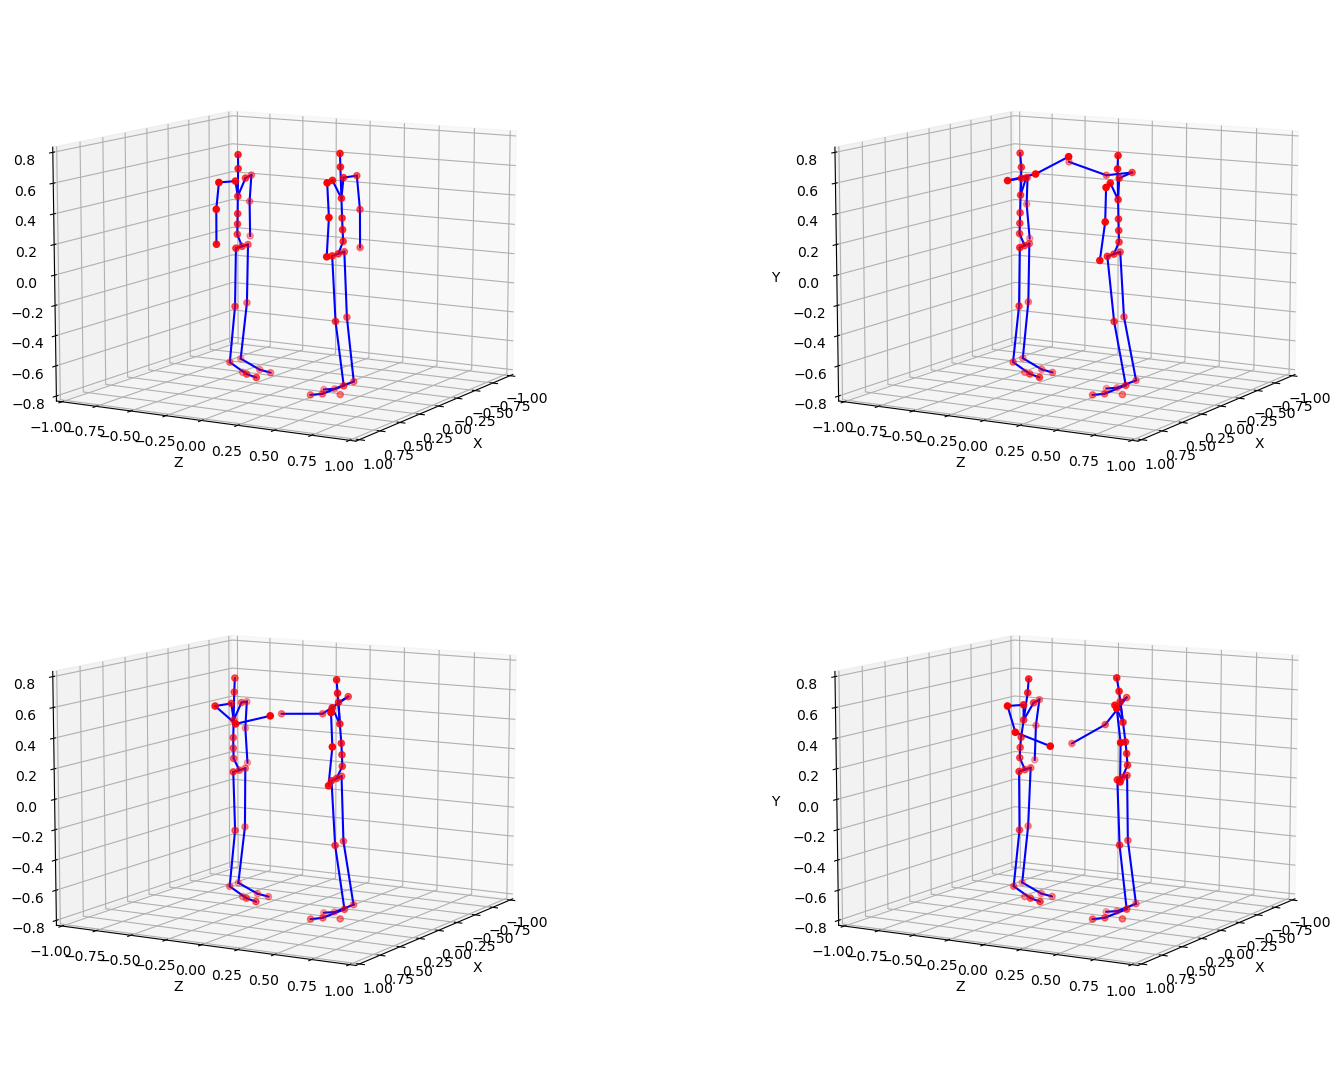

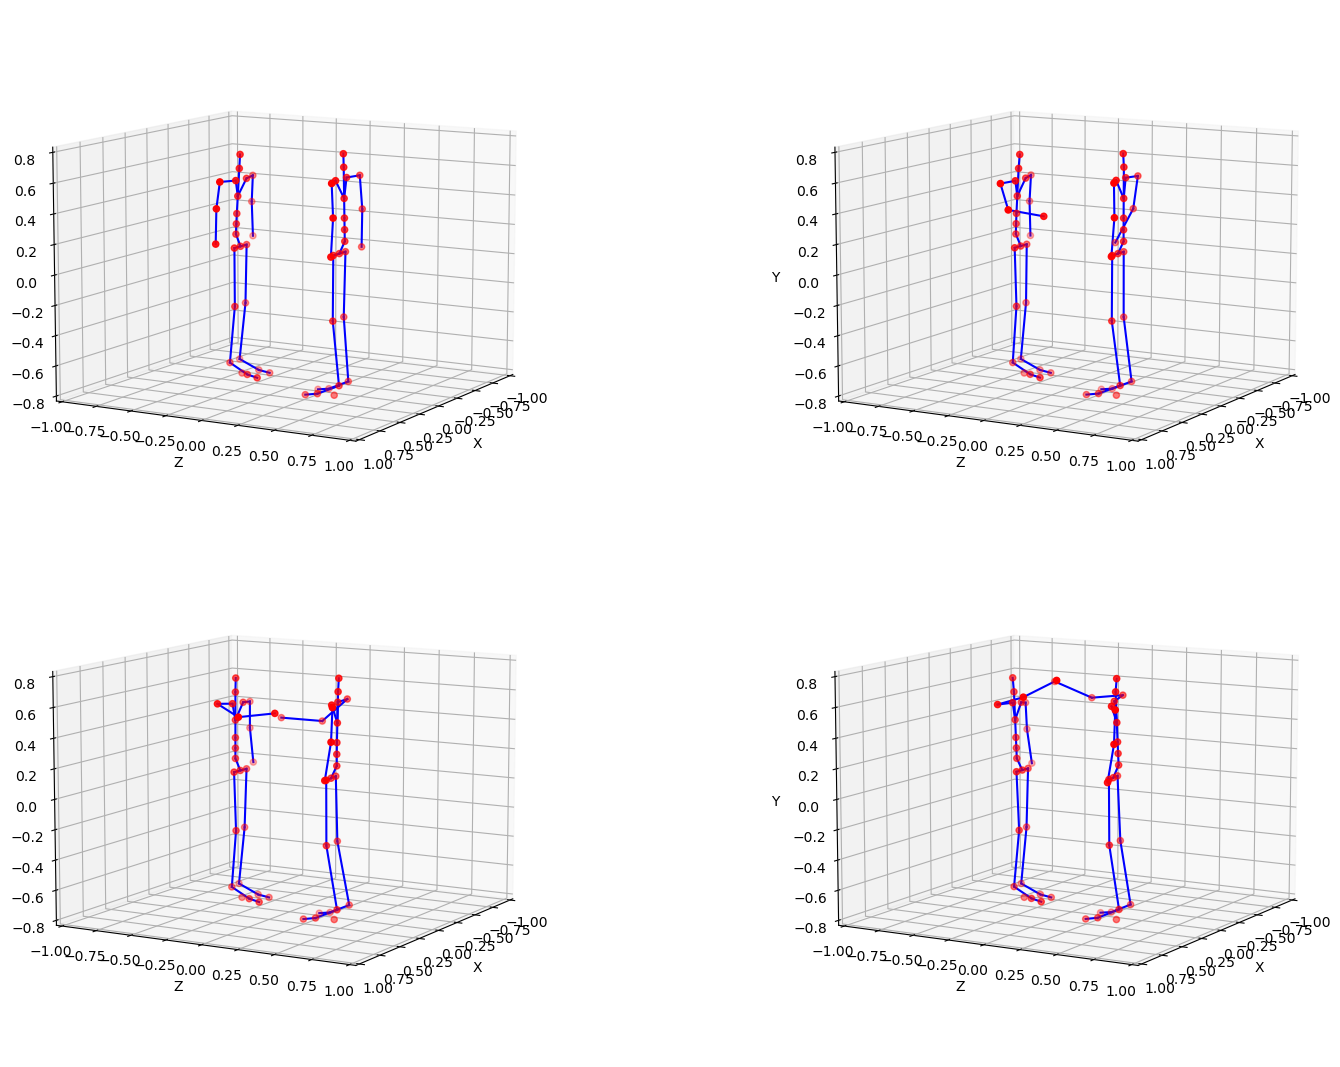

In [95]:
plot_data(data1_hand_shake, data2_hand_shake)
plot_data(data1_hand_wave, data2_hand_wave)
plot_data(data1_parachute, data2_parachute)
plot_data(data1_rocket, data2_rocket)
